In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
os.chdir("/content/drive/MyDrive/mine ")

In [3]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist

# load the datasets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


## Inspecting our data

In [4]:
print(f" dimension of training images is {X_train.shape}")
print(f" dimension of training labels is {y_train.shape}")
print(f" dimension of testing images is {X_test.shape}")
print(f" dimension of testing labels is {y_test.shape}")
print(f"there are {len(set(y_train))} classes in training labels")
print(f"there are {len(set(y_test))} classes in testing labels")
print(f"there are {len(X_train)} samples in our training datasets")
print(f"there are {len(X_test)} samples in our testing datasets")


 dimension of training images is (60000, 28, 28)
 dimension of training labels is (60000,)
 dimension of testing images is (10000, 28, 28)
 dimension of testing labels is (10000,)
there are 10 classes in training labels
there are 10 classes in testing labels
there are 60000 samples in our training datasets
there are 10000 samples in our testing datasets


we have to change the shape of our data to this format (6000, 28, 28, 1)
where 1 is the number of colour channels. it is one because it is grayscale

## Visualize random samples in our data  

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import random
def plot_image(x_train, y_train, figsize = (10, 7)):
  plt.figure(figsize = figsize)
  cols, rows = 5,5
  for i in range(1, rows*cols + 1):
    random_index = random.randint(0, len(X_train))
    plt.subplot(rows, cols, i)
    plt.imshow(x_train[random_index], cmap = "gray_r")
    plt.title(y_train[random_index])
    plt.axis("off")
  plt.show()

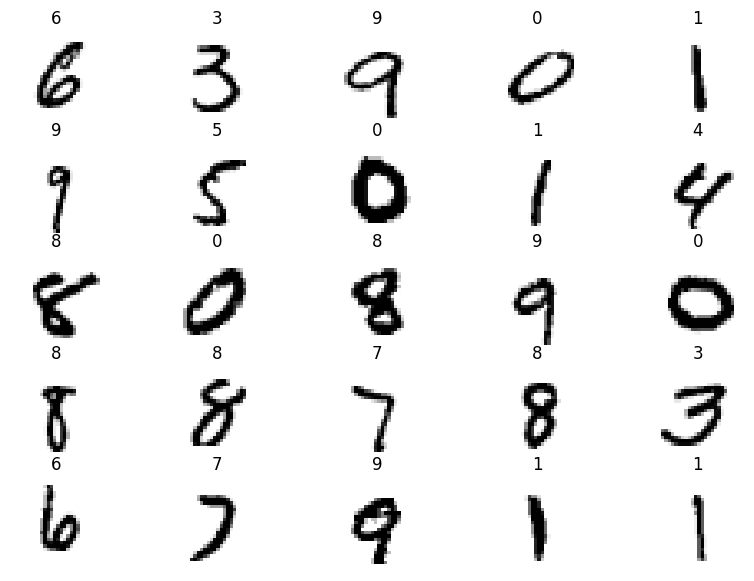

In [6]:
plot_image(X_train, y_train)

In [7]:
# let's check the datatype of our datasets
X_train.dtype, y_train.dtype, X_test.dtype, y_test.dtype

(dtype('uint8'), dtype('uint8'), dtype('uint8'), dtype('uint8'))

we have to change our datatype from uint8 top float16 or float32 for better performance of the models we will build.



## Let's preprocess the data

In [8]:
# let's save the number of rows and columns
img_rows = X_train[0].shape[0]
img_cols = X_train[0].shape[1]

#Getting the appropriate shape format of our data set
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)

# changing the dtype from uint8 to float32
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")
y_train = y_train.astype("float32")
y_test = y_test.astype("float32")

# normalizing the data
X_train /= 255
X_test /= 255

X_train.shape, X_test.shape, y_train.shape, y_test.shape, X_train.dtype, X_test.dtype, y_train.dtype, y_test.dtype

((60000, 28, 28, 1),
 (10000, 28, 28, 1),
 (60000,),
 (10000,),
 dtype('float32'),
 dtype('float32'),
 dtype('float32'),
 dtype('float32'))

## let's one hot encode our labels

In [9]:
y_train[0]

5.0

☹ Okay so our labels are now displaying the predicted values.
But we want our labels to be one hot encoded. This means that we want the predicted value to be 1 whiles the other ones are 0

In [10]:
# let's one hot encode our true labels using scikit learn
from sklearn.preprocessing import OneHotEncoder

one_hot_encoder = OneHotEncoder()
y_train = one_hot_encoder.fit_transform(y_train.reshape(-1, 1)).toarray()
y_test = one_hot_encoder.fit_transform(y_test.reshape(-1, 1)).toarray()

y_train[0]
y_train.shape, y_test.shape

((60000, 10), (10000, 10))

In [11]:
num_classes = y_train.shape[1]
num_classes

10

okay so now our data is OneHotEncoded

## Let's build our model

In [12]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import SGD

model = Sequential()
model.add(Conv2D(32, 3, activation = "relu", input_shape = (img_rows, img_cols, 1)))
model.add(Conv2D(64, 3, activation = "relu"))
model.add(MaxPooling2D(2))
model.add(Flatten())
model.add(Dense(128, activation = "relu"))
model.add(Dense(num_classes, activation = "softmax"))

model.summary()

model.compile(loss ="categorical_crossentropy",
              optimizer = SGD(0.001, momentum = 0.9),
              metrics = ["accuracy"])


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 64)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                        

## Let's train our model

In [13]:
batch_size = 128,
epochs = 25

history = model.fit(X_train, y_train,
                    batch_size = 128,
                    epochs = epochs,
                    verbose = 1,
                    validation_data = (X_test, y_test))

Epoch 1/25
469/469 [==============================] - 9s 10ms/step - loss: 0.7662 - accuracy: 0.7951 - val_loss: 0.2754 - val_accuracy: 0.9180
Epoch 2/25
469/469 [==============================] - 4s 8ms/step - loss: 0.2530 - accuracy: 0.9251 - val_loss: 0.2008 - val_accuracy: 0.9398
Epoch 3/25
469/469 [==============================] - 4s 8ms/step - loss: 0.1952 - accuracy: 0.9419 - val_loss: 0.1612 - val_accuracy: 0.9527
Epoch 4/25
469/469 [==============================] - 4s 8ms/step - loss: 0.1623 - accuracy: 0.9517 - val_loss: 0.1444 - val_accuracy: 0.9579
Epoch 5/25
469/469 [==============================] - 4s 8ms/step - loss: 0.1393 - accuracy: 0.9584 - val_loss: 0.1279 - val_accuracy: 0.9615
Epoch 6/25
469/469 [==============================] - 4s 8ms/step - loss: 0.1250 - accuracy: 0.9627 - val_loss: 0.1132 - val_accuracy: 0.9655
Epoch 7/25
469/469 [==============================] - 4s 8ms/step - loss: 0.1122 - accuracy: 0.9667 - val_loss: 0.1089 - val_accuracy: 0.9679
Epoch

In [14]:
# let's evaluate the model
score = model.evaluate(X_test, y_test, verbose = 1)
print(f"Test loss: {score[0]}")
print(f"Test accuracy: {score[1]}")

313/313 [==============================] - 1s 3ms/step - loss: 0.0629 - accuracy: 0.9800
Test loss: 0.06291264295578003
Test accuracy: 0.9800000190734863


# Visualize the results

In [15]:
# plot loss and accuracy curves
def plot_curves(history):
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]
  acc = history.history["accuracy"]
  val_acc = history.history["val_accuracy"]
  epochs = range(1, len(loss) + 1)
  plt.plot(epochs, loss, label = "Training loss")
  plt.plot(epochs, val_loss, label = "Validation loss")
  plt.title("Training and validation loss")
  plt.xlabel("Epochs")
  plt.ylabel("Loss")
  plt.legend()
  plt.show()
  plt.plot(epochs, acc, label = "Training accuracy")
  plt.plot(epochs, val_acc, label = "Validation accuracy")
  plt.title("Training and validation accuracy")
  plt.xlabel("Epochs")
  plt.ylabel("Accuracy")
  plt.legend()
  plt.show()

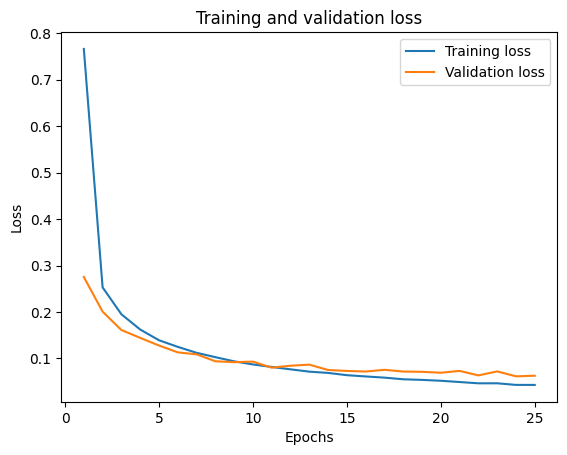

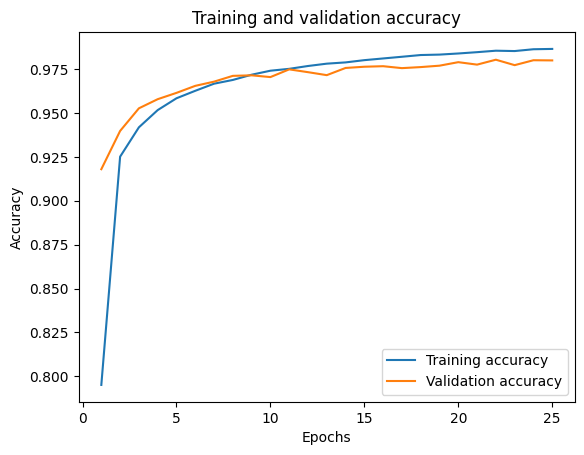

In [16]:
plot_curves(history)

## Save model

In [17]:
#save the model
model.save("model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## let's make some predictions

In [18]:
def predict(X_test, y_test):
  pred = np.argmax(model.predict(X_test), axis = 1)
  print(f" the pridicted values are: {pred}")
  print(f"we have {np.sum(pred == np.argmax(y_test, axis = 1))} correct predictions")
  return pred

In [19]:
pred_labels = predict(X_test, y_test)


313/313 [==============================] - 1s 2ms/step
 the pridicted values are: [7 2 1 ... 4 5 6]
we have 9800 correct predictions


the shape of our input image is: (28, 28, 1)


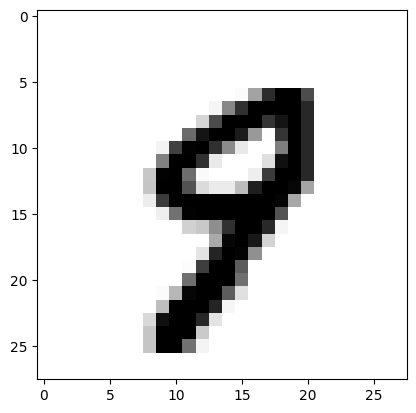

the shape of our input image is: (1, 28, 28, 1)
1/1 [==============================] - 0s 140ms/step
the predicted value is: 9


In [20]:
#Let's predict on one random image
input_image = random.choice(X_test)
print(f"the shape of our input image is: {input_image.shape}")
plt.imshow(input_image.reshape(28, 28), cmap = "gray_r")
plt.show()

# first reshape the image to the required shape for modelling
input_image = input_image.reshape(1, img_rows, img_cols, 1)

print(f"the shape of our input image is: {input_image.shape}")

#now let's predict on the image
pred = np.argmax(model.predict(input_image))
print(f"the predicted value is: {pred}")



In [21]:
pred_labels

array([7, 2, 1, ..., 4, 5, 6])

## Let's do something pretty here

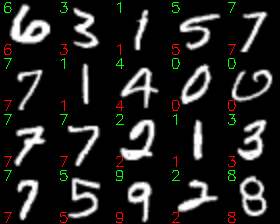

True

In [22]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

# Create a canvas function
def create_canvas(height, width, rgb_color=(255, 255, 255)):
    canvas = np.ones((height, width, 3), dtype="uint8") * np.array(rgb_color, dtype="uint8")
    return canvas

# Define plot_image function
def plot_image(canvas, img, row, col, pred_label, true_label, img_size):
    x, y = col * img_size, row * img_size
    img_bgr = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)  # Convert grayscale to BGR
    canvas[y:y+img_size, x:x+img_size] = img_bgr  # Assign the BGR image to canvas
    # Add the predicted label in red color
    cv2.putText(canvas, str(pred_label), (x + 2, y + img_size - 2),
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1)
    # Add the true label in green color above the image
    cv2.putText(canvas, str(true_label), (x + 2, y + 12),
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1)

# Parameters
img_size = 56  # New image size (make images bigger)
num_images = 20  # Number of images to plot

# Create a canvas with correct dimensions
rows = int(np.ceil(num_images / 5))  # Determine number of rows (4 rows for 20 images)
cols = 5  # Fixed number of columns
canvas_height = rows * img_size
canvas_width = cols * img_size
canvas = create_canvas(canvas_height, canvas_width)

# Shuffle the indices of the test set
indices = np.arange(len(X_test))
np.random.shuffle(indices)

# Select the first 20 indices from the shuffled list
selected_indices = indices[:num_images]

# Plot the selected 20 test images and their predicted labels
for plot_idx, idx in enumerate(selected_indices):
    img = X_test[idx] * 255  # Scale to 0-255
    img = cv2.resize(img, (img_size, img_size))  # Resize image to new size
    img = img.astype(np.uint8)  # Convert to uint8
    row, col = divmod(plot_idx, cols)  # Calculate row and column based on plot_idx
    plot_image(canvas, img, row, col, pred_labels[idx], np.argmax(y_test[idx]), img_size)

# Display the image using OpenCV
cv2_imshow(canvas)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Save the image using OpenCV
cv2.imwrite('mnist_test_data_predictions.png', canvas)

## Let's check the misclassification

313/313 [==============================] - 1s 2ms/step
There are 200 misclassified images


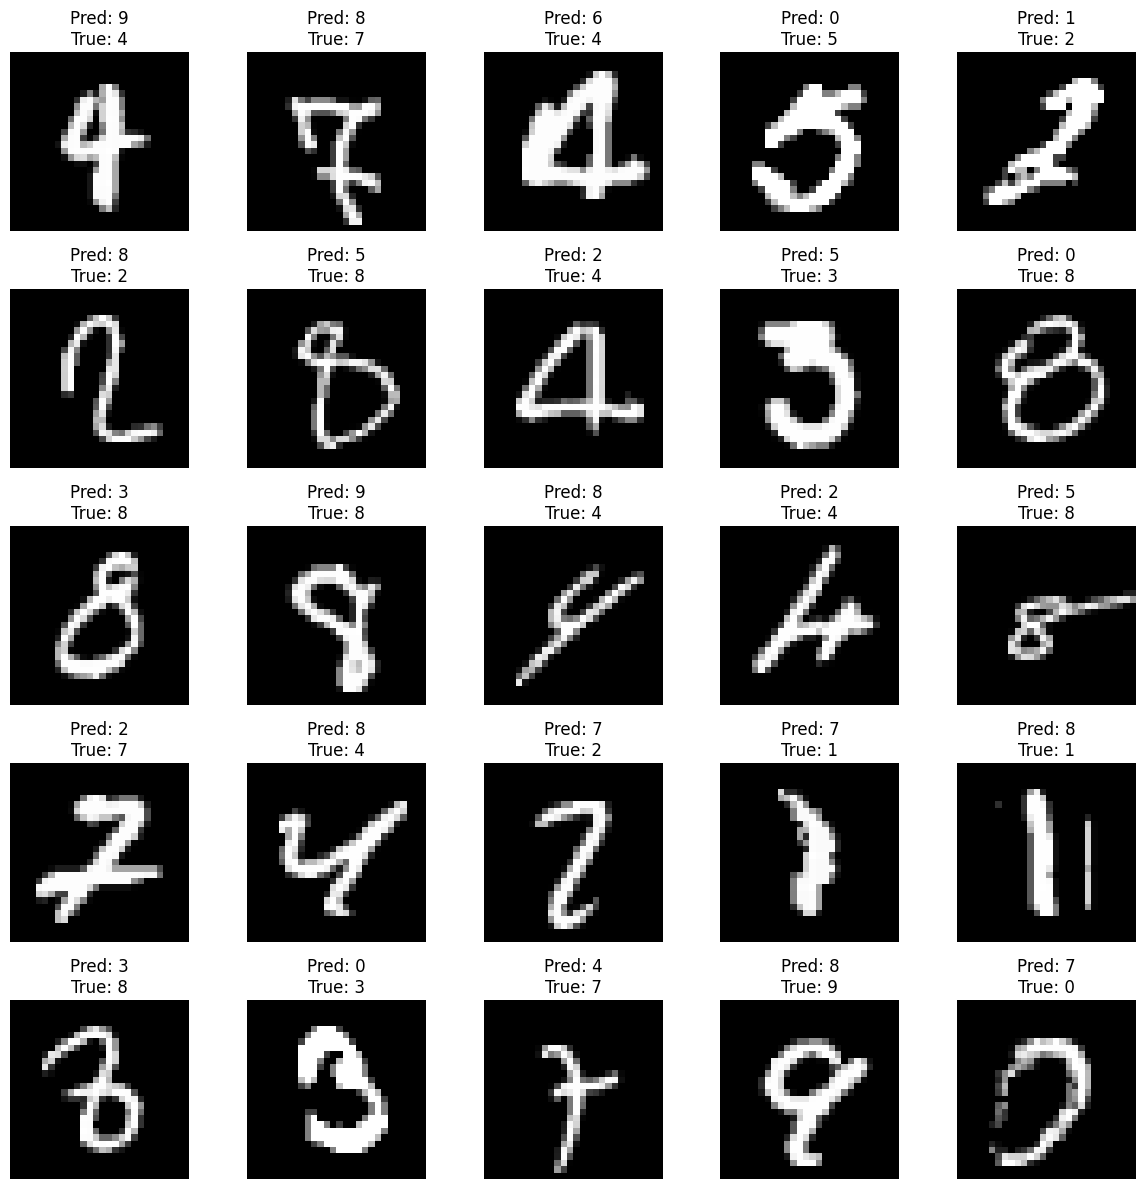

In [24]:
# let's create a function that views the misclassified
def plot_misclassified_images(model, X_test, y_test, num_images=25):

    # Predict the labels for the test set
    pred_labels = np.argmax(model.predict(X_test), axis=1)
    true_labels = np.argmax(y_test, axis=1)

    # Identify misclassified images
    misclassified_indices = np.where(pred_labels != true_labels)[0]
    print(f"There are {len(misclassified_indices)} misclassified images")

    # If there are fewer than num_images misclassified images, adjust num_images
    if len(misclassified_indices) < num_images:
        num_images = len(misclassified_indices)

    # Randomly select num_images misclassified indices
    selected_indices = random.sample(list(misclassified_indices), num_images)

    # Calculate the number of rows and columns for the plot
    num_rows = num_cols = int(np.sqrt(num_images))

    # Create a figure for the plot
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 12))

    # Loop through the indices and plot each image
    for i, idx in enumerate(selected_indices):
        ax = axes[i // num_cols, i % num_cols]
        image = X_test[idx].reshape((X_test.shape[1], X_test.shape[2]))
        true_label = true_labels[idx]
        pred_label = pred_labels[idx]

        ax.imshow(image, cmap='gray')
        ax.set_title(f"Pred: {pred_label}\nTrue: {true_label}")
        ax.axis('off')
    plt.tight_layout()
    plt.show()

plot_misclassified_images(model, X_test, y_test)


# let's create our confusion matrix

In [25]:

y_pred = predict(X_test, y_test)
confusion_mat = confusion_matrix(np.argmax(y_test, axis=1), y_pred)
confusion_mat

313/313 [==============================] - 1s 2ms/step
 the pridicted values are: [7 2 1 ... 4 5 6]
we have 9800 correct predictions


array([[ 972,    0,    1,    1,    1,    0,    2,    1,    2,    0],
       [   0, 1124,    2,    0,    0,    3,    2,    1,    3,    0],
       [   9,    1, 1011,    1,    0,    0,    2,    3,    5,    0],
       [   1,    0,    3,  991,    0,    6,    0,    2,    4,    3],
       [   0,    1,    5,    0,  951,    0,    5,    0,    3,   17],
       [   3,    0,    0,    3,    2,  878,    1,    1,    4,    0],
       [   7,    2,    0,    1,    3,    3,  939,    0,    2,    1],
       [   1,    2,   10,    1,    2,    0,    0,  995,    9,    8],
       [   4,    1,    3,    3,    1,    3,    0,    1,  956,    2],
       [   2,    1,    0,    3,    7,    4,    0,    3,    6,  983]])

313/313 [==============================] - 1s 3ms/step


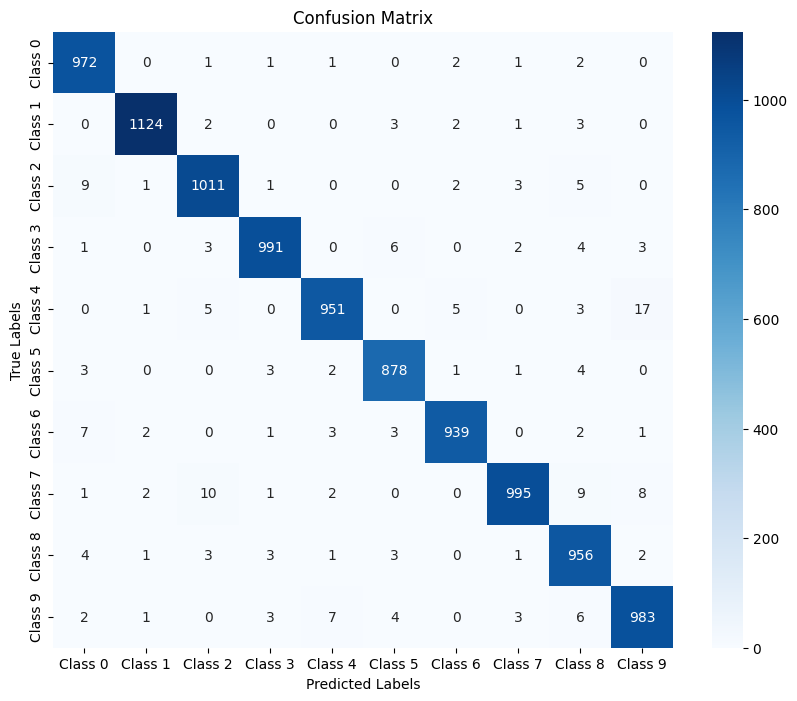

In [26]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
def plot_confusion_matrix(model, X_test, y_test, file_path):
    # Predict the labels for the test set
    y_pred = np.argmax(model.predict(X_test), axis=1)
    y_true = np.argmax(y_test, axis=1)

    # Compute the confusion matrix
    confusion_mat = confusion_matrix(y_true, y_pred)

    # Get class names from the unique values in y_test
    class_names = [f"Class {i}" for i in range(y_test.shape[1])]

    # Create a heatmap for the confusion matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')

    # Save the plot as an image file
    plt.savefig(file_path)
    plt.show()

plot_confusion_matrix(model, X_test, y_test, "confusion_matrix.png")


In [27]:
from sklearn.metrics import classification_report

print(classification_report(np.argmax(y_test, axis = 1),pred_labels))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.99      0.98      0.98      1010
           4       0.98      0.97      0.98       982
           5       0.98      0.98      0.98       892
           6       0.99      0.98      0.98       958
           7       0.99      0.97      0.98      1028
           8       0.96      0.98      0.97       974
           9       0.97      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

